
# 项目：Project: Chemical Properties and Quality of Wines Dataset

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介

> **提示**：  
这个案例中我们将获得两组数据：红葡萄酒和白葡萄酒，每种葡萄酒样本都有质量评分，得分从一到十，还有若干理化检验的结果，意味着我们可以分析各种性质，如酒精度，酸度，和残留糖量，我们根据这些数据提出两个问题：  
  
>>1.某种类型的葡萄酒（红葡萄酒或白葡萄酒）是否代表更高的品质？    
2.葡萄酒获得的评级高低与这几个因素有何关系：酒精含量、残留糖度和酸度水平。
  
>我们根据这些问题去对数据集进行相应的数据清洗工作，拿到干净的数据之后再对相应的数据进行适当的可视化处理，并对可视化的结果进行分析推理，得出结论，以完成这个项目。

In [1]:
#导入相应模块，
# np用于后面添加新列使用
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
% matplotlib inline

<a id='wrangling'></a>
## 数据整理

> **提示**：我们在报告的这一部分中载入数据，检查数据的简洁度，然后整理和清理数据集，以便进行分析。

>### 常规属性

>> **提示**：对数据进行常规操作，查看数据的大体情况，以对数据有个整体的把握。

In [4]:
#添加csv，由于数据之间用分号分隔，所以代码写出分隔方法
df_red = pd.read_csv('winequality-red.csv',sep= ';')
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
#查看整体数据的情况，有多少条数据，有多少缺失的数据，以及有无冗余数据
df_red.shape

(1599, 12)

In [6]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [12]:
#检查质量有多少唯一值
df_red['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [8]:
#检查冗余数据的总数
sum(df_red.duplicated())

240

In [13]:
#对白葡萄酒的数据进行相同的处理

df_white = pd.read_csv('winequality-white.csv',sep= ';')
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [14]:
#检查质量有多少唯一值
df_white['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [16]:
df_white.shape

(4898, 12)

In [17]:
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [18]:
df_white['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [20]:
sum(df_white.duplicated())

937

### 数据问题：  

>#### 1.冗余数据：  
- 两表都有很多冗余数据，需要进行核对考虑是否需要删除  

>#### 2.表格过多：
- 同时持有红葡萄酒和白葡萄酒两个表格，需要对其分别研究，可视化也不好表现，需要合成形成一个表格


### 数据清理：  

- __冗余数据处理：__  


In [22]:
#输出这些冗余数据进行查看
df_red[df_red.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
76,8.8,0.410,0.64,2.20,0.093,9.0,42.0,0.99860,3.54,0.66,10.5,5
91,8.6,0.490,0.28,1.90,0.110,20.0,136.0,0.99720,2.93,1.95,9.9,6
93,7.7,0.490,0.26,1.90,0.062,9.0,31.0,0.99660,3.39,0.64,9.6,5
102,8.1,0.545,0.18,1.90,0.080,13.0,35.0,0.99720,3.30,0.59,9.0,6
105,8.1,0.575,0.22,2.10,0.077,12.0,65.0,0.99670,3.29,0.51,9.2,5


In [24]:
df_white[df_white.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
5,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
7,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
8,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
20,6.2,0.660,0.48,1.20,0.029,29.0,75.0,0.98920,3.33,0.39,12.800000,8
39,7.3,0.240,0.39,17.95,0.057,45.0,149.0,0.99990,3.21,0.36,8.600000,5
48,7.0,0.310,0.26,7.40,0.069,28.0,160.0,0.99540,3.13,0.46,9.800000,6
61,6.0,0.190,0.26,12.40,0.048,50.0,147.0,0.99720,3.30,0.36,8.900000,6
63,6.6,0.380,0.15,4.60,0.044,25.0,78.0,0.99310,3.11,0.38,10.200000,6
74,6.7,0.230,0.31,2.10,0.046,30.0,96.0,0.99260,3.33,0.64,10.700000,8


__结论__：根据上面两得知这些数据并不是完全一样，不用进行删除处理    

- __合并列处理：__  
__1.创建颜色列 __  
创建两个数组，长度与重复 “红” 或 “白” 值的红白葡萄酒数据框的行数相同，将名为 ‘颜色’ 的新列设置到适当数组，将数组添加到红葡萄酒和白葡萄酒数据框中。

In [25]:
# 为红葡萄酒数据框创建颜色数组
df_red['color'] = 'red'
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [26]:
# 为白葡萄酒数据框创建颜色数组
df_white['color'] = 'white'
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [27]:
#将df_red赋给wine_df，
#以便再wine_df后直接添加df_white
wine_df=df_red
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [28]:
#将两个表和成一个表
winequality=wine_df.append(df_white,ignore_index=True)

In [29]:
#检验新表是否合成刚刚两组的数据
winequality.shape

(6497, 13)

In [30]:
#将新组合的数据框保存为 winequality_edited.csv。
#务必设置 index=False，以避免保存未命名列！
winequality.to_csv('winequality_edited.csv',index=False) 

In [31]:
#读入新表并查看
df = pd.read_csv('winequality_edited.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [32]:
#倒序查看几行
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white


<a id='eda'></a>
## 探索性数据分析

> **提示**：在完成了数据整理和清理之后，就可以进行探索性数据分析了。根据问题需要计算统计值，创建可视化图表，解决在一开始的简介部分中提出的研究问题。

### 研究问题之前：
> **提示**：对CSV中的数据进行可视化输出，对整体数据有一个大体把握:   

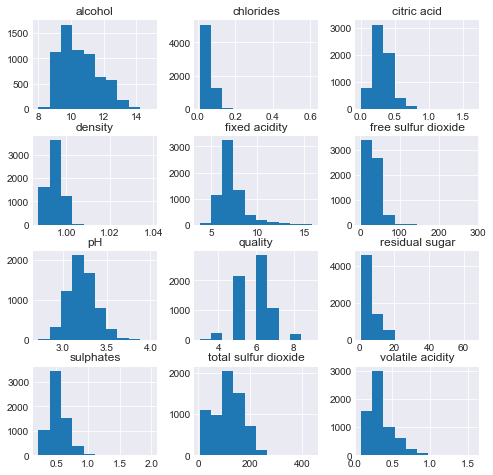

In [46]:
#各个特征的直方图

df.hist(figsize=(8,8));

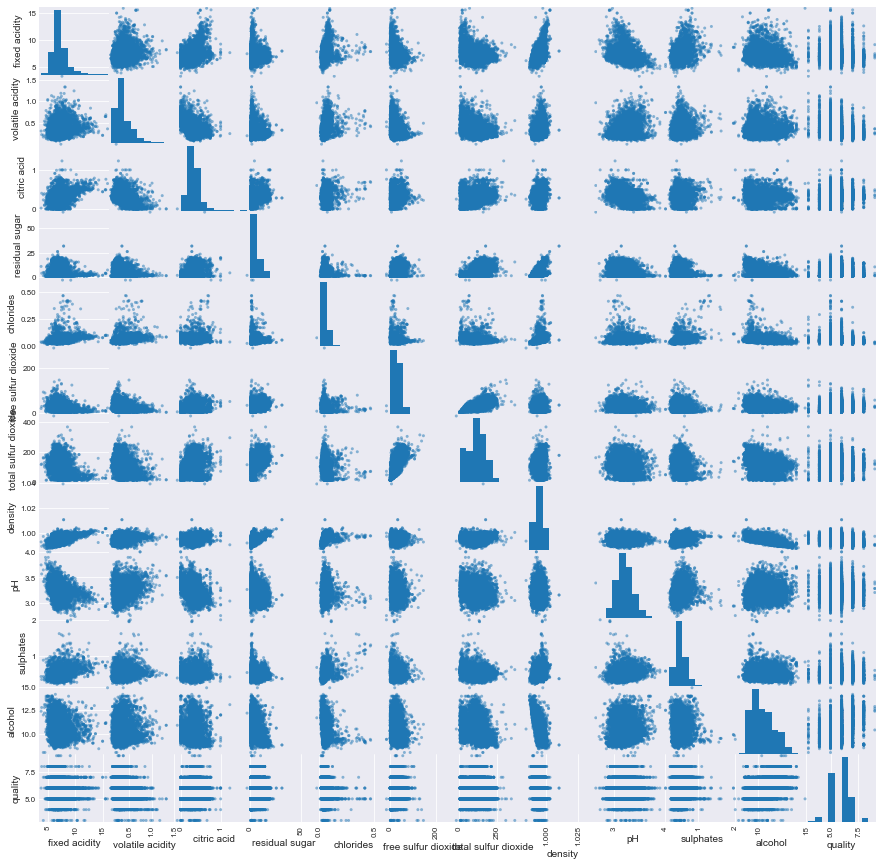

In [47]:
#质量与各个特征的散点图

pd.plotting.scatter_matrix(df,figsize=(15,15));

In [37]:
#查看一下所有质量为7的ph均值

df.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,7.853333,0.517000,0.281000,5.140000,0.077033,39.216667,122.033333,0.995744,3.257667,0.506333,10.215000
4,7.288889,0.457963,0.272315,4.153704,0.060056,20.636574,103.432870,0.994833,3.231620,0.505648,10.180093
5,7.326801,0.389614,0.307722,5.804116,0.064666,30.237371,120.839102,0.995849,3.212189,0.526403,9.837783
6,7.177257,0.313863,0.323583,5.549753,0.054157,31.165021,115.410790,0.994558,3.217726,0.532549,10.587553
7,7.128962,0.288800,0.334764,4.731696,0.045272,30.422150,108.498610,0.993126,3.228072,0.547025,11.386006
8,6.835233,0.291010,0.332539,5.382902,0.041124,34.533679,117.518135,0.992514,3.223212,0.512487,11.678756
9,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.180000


In [41]:
#不以质量或者颜色作为索引，就可以设置as_index为False
#以质量和颜色分组，所有其他特征的平均值

df.groupby(['quality','color'],as_index=False).mean()

,quality,color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,3,red,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
1,3,white,7.600000,0.333250,0.336000,6.392500,0.054300,53.325000,170.600000,0.994884,3.187500,0.474500,10.345000
2,4,red,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
3,4,white,7.129448,0.381227,0.304233,4.628221,0.050098,23.358896,125.279141,0.994277,3.182883,0.476135,10.152454
4,5,red,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
5,5,white,6.933974,0.302011,0.337653,7.334969,0.051546,36.432052,150.904598,0.995263,3.168833,0.482203,9.808840
6,6,red,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,6,white,6.837671,0.260564,0.338025,6.441606,0.045217,35.650591,137.047316,0.993961,3.188599,0.491106,10.575372
8,7,red,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
9,7,white,6.734716,0.262767,0.325625,5.186477,0.038191,34.125568,125.114773,0.992452,3.213898,0.503102,11.367936


### 问题 1：某种类型的葡萄酒（红葡萄酒或白葡萄酒）是否代表更高的品质？
> **提示**：对于此问题，将红葡萄酒的平均质量与白葡萄酒的平均质量等级进行比较。要这样做，先按颜色分组，然后找到每组的平均质量等级。

In [43]:
df.groupby(['color'],as_index=False)['quality'].mean()

,color,quality
0,red,5.636023
1,white,5.877909


### 数据可视化呈现

Text(0,0.5,'Quality')

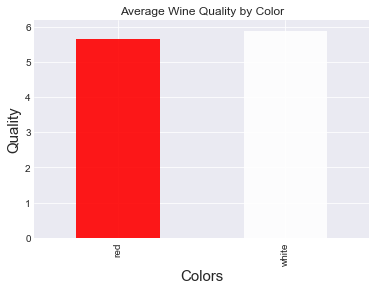

In [49]:
#创建可视化
color_means = df.groupby('color')['quality'].mean()
color_means.plot(kind='bar',title='Average Wine Quality by Color',color=[('r','w')],alpha=.9)
plt.xlabel('Colors', fontsize=15)
plt.ylabel('Quality', fontsize=15)

**优化**：对该可视化图形进行优化，使其可以直观表达不同质量的白葡萄酒和红葡萄酒之间的关系：


> **提示:** 为红葡萄酒条柱高度和白葡萄酒条柱高度创建数组  
>记住，颜色和质量等级的每个组合有一个条柱。每个条柱的高度基于这个颜色与这个质量等级的样本的比例。
>1. 红葡萄酒条柱比例 = 每个质量等级的数量 / 红葡萄酒样本的总数
>2. 白葡萄酒条柱比例 = 每个质量等级的数量 / 白葡萄酒样本的总数

In [51]:
# 获取每个等级和颜色的数量
color_counts = df.groupby(['color', 'quality']).count()['pH']
# 获取每个颜色的总数
color_totals = df.groupby('color').count()['pH']
# 将红葡萄酒等级数量除以红葡萄酒样本总数，获取比例
red_proportions = color_counts['red'] / color_totals['red']
red_proportions

quality
3    0.006254
4    0.033146
5    0.425891
6    0.398999
7    0.124453
8    0.011257
Name: pH, dtype: float64

In [52]:
# 将白葡萄酒等级数量除以白葡萄酒样本总数，获取比例
white_proportions = color_counts['white'] / color_totals['white']
white_proportions

quality
3    0.004083
4    0.033279
5    0.297468
6    0.448755
7    0.179665
8    0.035729
9    0.001021
Name: pH, dtype: float64

>**提示:** 因为质量为9白葡萄酒是含有数据的，所以在红葡萄酒处即使为0也需要显示

In [53]:
red_proportions['9'] = 0
red_proportions

quality
3    0.006254
4    0.033146
5    0.425891
6    0.398999
7    0.124453
8    0.011257
9    0.000000
Name: pH, dtype: float64

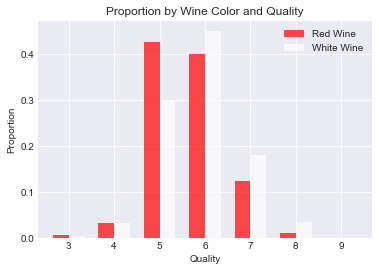

In [54]:
ind = np.arange(len(red_proportions))  # 组的 x 坐标位置
width = 0.35       # 条柱的宽度
# 绘制条柱
red_bars = plt.bar(ind, red_proportions, width, color='r', alpha=.7, label='Red Wine')
white_bars = plt.bar(ind + width, white_proportions, width, color='w', alpha=.7, label='White Wine')

# 标题和标签
plt.ylabel('Proportion')
plt.xlabel('Quality')
plt.title('Proportion by Wine Color and Quality')
locations = ind + width / 2  # x 坐标刻度位置
labels = ['3', '4', '5', '6', '7', '8', '9']  # x 坐标刻度标签
plt.xticks(locations, labels)

# 图例
plt.legend()

 ### 分析与结论：  
 #### 根据上面的可视化图形可以得出以下调查结果：  
 1.如果只粗略的看第一张图的话，是可以得出白葡萄酒的质量稍比红葡萄酒高；  
   
   
 2.从第二张优化的细节图中就能得到更多：在质量为3,4,5 时，红葡萄酒的质量是高于白葡萄酒的；  
   
   
 3.但是当质量升高到6,7,8,9 时，红葡萄酒的质量明显比不上白葡萄酒了。

### 问题 2：葡萄酒获得的评级高低与这几个因素有何关系：酸度水平(pH)、酒精含量和残留糖度。

>**提示:** 这个问题比较棘手，它是一个复合型问题，我们需要拆开分别研究酸度水平（pH）、酒精含量和残留糖度。  

- __酸度水平(pH)对葡萄酒获得的评级高低有何影响？__
>**提示:** 因为不同于颜色有明确的分类可以分组（红葡萄酒和白葡萄酒），pH 值是一个没有明确类别的定量变量。但是，有一个简单的解决方案。你可以通过创建自己的类别，从定量变量创建一个分类变量。创建具有以下类别的名为acidity_levels的新列：  
>**方法:**按酸度水平划分为：  
高: 最低 25% 时的 pH 值  
中等偏高: 25% - 50% 时的 pH 值  
中: 50% - 75% 时的 pH 值  
低: 最高 75% 时的 pH 值  
在这里，数据在 25%、50% 和 75% 三个百分比处做了拆分。记住，你可以使用 Pandas 的 describe() 函数获得这些数字！创建这四个类别后，你可以使用 groupby 获得每个酸度水平的平均质量评级。

In [18]:
# 用 Pandas 描述功能查看最小、25%、50%、75% 和最大pH值
df.describe()['pH']

count    6497.000000
mean        3.218501
std         0.160787
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64

In [56]:
# 对用于把数据“分割”成组的边缘进行分组
bin_edges = [ 2.720000,3.110000 ,3.210000 ,3.320000 ,4.010000 ] # 用刚才计算的五个值填充这个列表

In [57]:
# 四个酸度水平组的标签
bin_names = ['high' ,'high_Medium' , 'Medium','low' ] # 对每个酸度水平类别进行命名

In [58]:
# 创建 acidity_levels 列
df['acidity_levels'] = pd.cut(df['pH'], bin_edges, labels=bin_names)

# 检查该列是否成功创建
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,high_Medium
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,Medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,high_Medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


In [59]:
# 用 groupby 计算每个酸度水平的平均质量
df.groupby(['acidity_levels'],as_index=False)['quality'].mean()

,acidity_levels,quality
0,high,5.783343
1,high_Medium,5.784540
2,Medium,5.850832
3,low,5.859593


In [60]:
# 保存更改，输出CSV
df.to_csv('winequality_edited.csv', index=False)

### 数据可视化呈现
>__提示：__ 创建柱状图，四个酸度水平分别用一个条柱表示。

In [61]:
# 使用分组功能获取每个酸度水平的平均质量

low_acidity = df[df['acidity_levels'] =='low']
high_Medium_acidity = df[df['acidity_levels'] =='high_Medium']
Medium_acidity = df[df['acidity_levels'] =='Medium']
high_acidity = df[df['acidity_levels'] =='high']

mean_quality_low_acidity = low_acidity['quality'].mean()
mean_quality_high_Medium_acidity = high_Medium_acidity['quality'].mean()
mean_quality_Medium_acidity = Medium_acidity['quality'].mean()
mean_quality_high_acidity =high_acidity['quality'].mean()

Text(0,0.5,'Average Quality Rating')

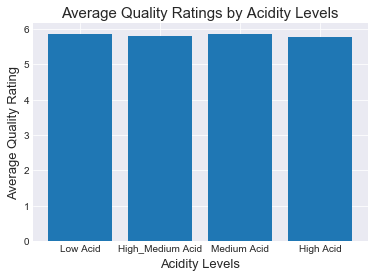

In [68]:
# 用合适的标签创建柱状图

locations = [1, 2, 3, 4]
heights = [mean_quality_low_acidity, mean_quality_high_Medium_acidity, mean_quality_Medium_acidity, mean_quality_high_acidity]
labels = ['Low Acid', 'High_Medium Acid', 'Medium Acid', 'High Acid']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Acidity Levels',fontsize=15)
plt.xlabel('Acidity Levels',fontsize=13)
plt.ylabel('Average Quality Rating',fontsize=13)

 ### 分析与结论：  
 #### 根据上面的可视化图形可以得出以下调查结果：  
 1.不同酸度造成的葡萄酒的品质差异不是很大；  
   
 2.从微小的差异中还是可以看出酸度越低的葡萄酒品质越高。

- __酒精含量高低对葡萄酒获得的评级高低有何影响？__
>**提示:** 要回答这个问题，创建两组葡萄酒样本:  
1.低酒精（酒精含量低于中值的样本）  
2.高酒精（酒精含量高于或等于中值的样本）  
然后，找到每组的平均质量评级。


In [3]:
# 获取酒精含量的中位数
df['alcohol'].median()

10.3

In [4]:
# 选择酒精含量小于平均值的样本
low_alcohol = df[df['alcohol']<10.3]

# 选择酒精含量大于等于平均值的样本
high_alcohol = df[df['alcohol']>= 10.3]

# 确保这些查询中的每个样本只出现一次
num_samples = df.shape[0]
num_samples == low_alcohol['quality'].count() + high_alcohol['quality'].count() # 应为真

True

In [5]:
# 获取低酒精含量组和高酒精含量组的平均质量评分
low_alcohol['quality'].mean()

5.475920679886686

In [6]:
high_alcohol['quality'].mean()

6.146084337349397

### 数据可视化呈现
>__提示：__ 创建柱状图，用一个条柱表示酒精含量低的酒样本，另一个条柱表示酒精含量高的酒样本。

In [7]:
# 用查询功能选择每个组，并获取其平均质量
median = df['alcohol'].median()
low = df.query('alcohol < {}'.format(median))
high = df.query('alcohol >= {}'.format(median))

mean_quality_low = low['quality'].mean()
mean_quality_high = high['quality'].mean()

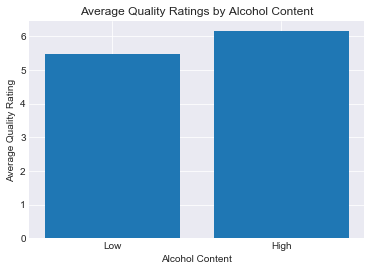

In [8]:
# 用合适的标签创建柱状图
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Rating');

 ### 分析与结论：  
 #### 根据上面的可视化图形可以得出以下调查结果：  
 1.图上可以看出酒精含量高的葡萄酒品质比较高；  
   
   
 2.可视化展示的结果吻合数据生成的表格；  
   

- __更甜的葡萄酒（残糖更多）对葡萄酒获得的评级高低有何影响？__
>**提示:** 同样，使用中值按残糖将样本分为两组，并找出每组的平均质量评级。


In [9]:
# 获取残留糖分的平均值
df['residual sugar'].mean()

5.4432353393874156

In [10]:
# 选择残留糖分小于平均值的样本
low_sugar = df[df['residual sugar']<5.4432353393874156]

# 选择残留糖分大于等于平均值的样本
high_sugar = df[df['residual sugar']>=5.4432353393874156]

# 确保这些查询中的每个样本只出现一次
num_samples == low_sugar['quality'].count() + high_sugar['quality'].count() # 应为真

True

In [11]:
# 获取低糖分组和高糖分组的平均质量评分
low_sugar['quality'].mean()

5.845544554455445

In [12]:
high_sugar['quality'].mean()

5.773707773707773

### 数据可视化呈现
>__提示：__ 创建柱状图，用一个条柱表示残留糖分低的酒样本，另一个条柱表示残留糖分高的酒样本。

In [13]:
mean_sugar = df['residual sugar'].mean()
mean_sugar

5.4432353393874156

In [16]:
# 用查询功能选择每个组，并获取其平均质量

low_sugar = df[df['residual sugar'] < 5.4432353393874156]
high_sugar = df[df['residual sugar'] >= 5.4432353393874156]

mean_quality_low_sugar = low_sugar['quality'].mean()
mean_quality_high_sugar = high_sugar['quality'].mean()

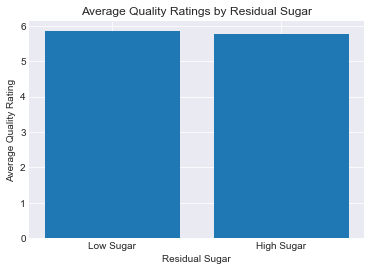

In [17]:
# 用合适的标签创建柱状图

locations = [1, 2]
heights = [mean_quality_low_sugar, mean_quality_high_sugar]
labels = ['Low Sugar', 'High Sugar']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Residual Sugar')
plt.xlabel('Residual Sugar')
plt.ylabel('Average Quality Rating');

跟之前结论差的有点多，__记得__查看原因

 ### 分析与结论：  
 #### 根据上面的可视化图形可以得出以下调查结果：  
 1.图上可以看出残留糖度比较低的葡萄酒品质比较高；  
   
   
 2.可视化展示的结果吻合数据生成的表格；  
   

<a id='conclusions'></a>
## 结论

> 正如上面研究分析所说，如果我想酿造出一款品质上佳的葡萄酒，应用白葡萄为原料，在不失口感的前提下，酸度越低越好，酒精度在可控的范围内尽量的高，而且用技术使残留的糖分越少越好。  

> __局限性：__我想说清楚的是，这个解决方案还是有些粗糙，比如报告中对其他的化学性质的控制并没有体现，比如同样酸度的白葡萄酒也许在密度不同的情况下，呈现的质量也不同，而且研究的4个方面的小问题，哪个对质量的影响最为显著也有待深入研究。当然，上面只是对导致葡萄酒不同质量的例子而已，还是有很多因素需要考虑到！